### Before continuing, make sure you have Wiki DB installed and in the same directory as this program. See README for link

## Import Dependencies 

In [116]:
import scipy.io
import os
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime
from datetime import datetime, timedelta


## Load Relevant Metadata

In [117]:
# Path to the local dataset directory
data_dir = './wiki'

# Path to the metadata file
metadata_file = os.path.join(data_dir, 'wiki.mat')

# Load the metadata from the .mat file
metadata = scipy.io.loadmat(metadata_file)
# Extract the relevant metadata
wiki_data = metadata['wiki'][0, 0]
image_paths = wiki_data['full_path'][0]
names = wiki_data['name'][0]
genders = wiki_data['gender'][0]
birthdates = wiki_data['dob'][0]
face_scores = wiki_data['face_score'][0]
photo_taken = wiki_data['photo_taken'][0]
# MATLAB's reference date (0 days since year 0)
reference_date = datetime(1, 1, 1)



## Visualize 5 examples 

test


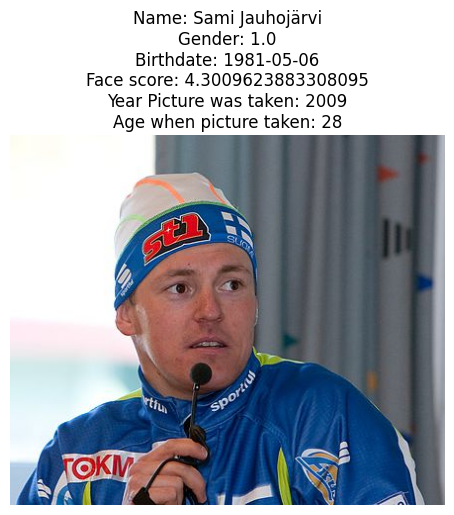

test


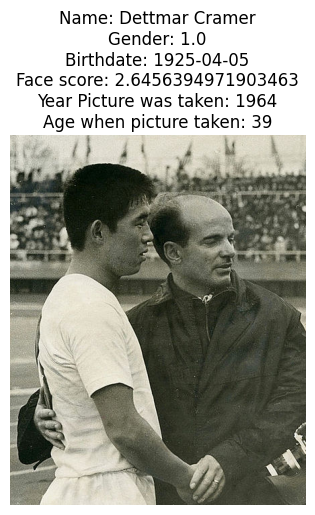

test


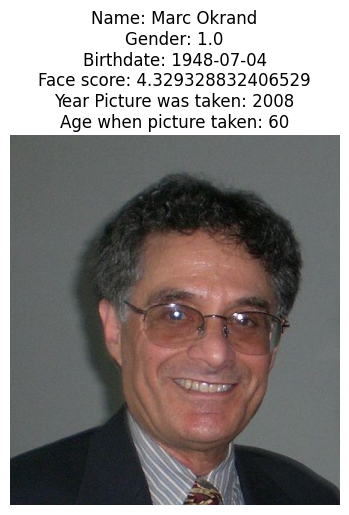

test


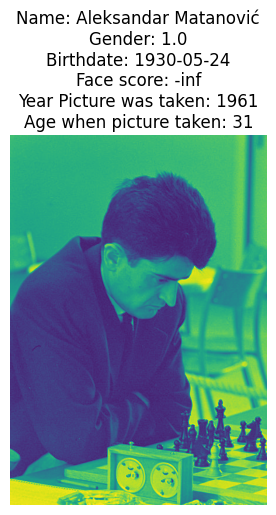

test


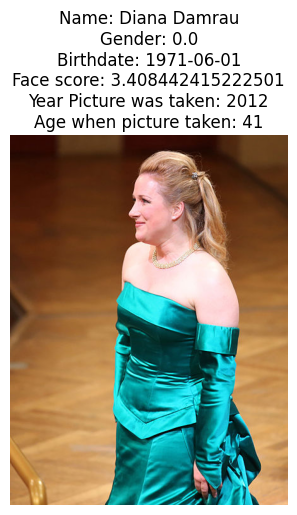

In [118]:
# Function to convert MATLAB serial date number to a readable date
def convert_dob(dob):
    reference_date = datetime(1, 1, 1)
    days_since_reference = int(dob)
    actual_date = reference_date + timedelta(days=days_since_reference - 366)
    return actual_date.strftime("%Y-%m-%d")  # Format as Year-Month-Day

# Function to display an image with its metadata
def display_image_with_metadata(image_path, name, gender, dob, face_score, photo_taken):
    # Construct the full image path
    full_image_path = os.path.join(data_dir, image_path[0])
    birthdate_str = convert_dob(dob)

    # Open and display the image
    image = Image.open(full_image_path)
    plt.imshow(image)
    plt.imshow(image)
    title = (f"Name: {name[0]}\n"
             f"Gender: {gender}\n"
             f"Birthdate: {birthdate_str}\n"
             f"Face score: {face_score}\n"
             f"Year Picture was taken: {photo_taken}\n"
             # Can be off by 1 year, since db does not have month/day picture was taken
             f"Age when picture taken: {photo_taken - int(birthdate_str[:4])}"
             )
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display a few images with their metadata
for i in range(5):
    print("test")
    display_image_with_metadata(image_paths[i], names[i], genders[i], dobs[i], face_scores[i], photo_taken[i])
    

## Split Data


## Build Model